In [62]:
import numpy as np
import scanpy as sc
import pandas as pd
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [63]:
path_to_figs = "/ubc/cs/research/beaver/projects/carlos/hyperbolic/figures/benchmarking/pancreas/"
path_to_evals = "/ubc/cs/research/beaver/projects/carlos/hyperbolic/results/benchmarking/pancreas/pgm_cu_5runs/"

In [64]:
cluster_to_use = "louvain"
metrics_to_use = ["MI", "NMI", "ARI"]

# Figure params
fig_size = (3.5, 3.5)
large_fs = 12
small_fs = 9

inset_y_pos = 0.6
inset_width = 0.15
inset_height = 0.35

In [65]:
model_to_color = {
    "cu": "#d90429",
    "pgm": "#1d3557"
}

model_to_name = {
    "cu": "CellUntangler (Z1 no grad)",
    "pgm": "PGM-AD (Z2 not informed)"
}

### Visualizing z2 results: developmental trajectory / clusters_fine

In [66]:
df = pd.read_csv(path_to_evals + "eval_clusters_fine", sep="\t", index_col=0)
df = df[metrics_to_use + ["model", "latent", "iter"]]
df = df[df["latent"] == "z2"]
df = df[df.index.str.contains(cluster_to_use)]
df.sort_values(by=["model", "iter"])

,MI,NMI,ARI,model,latent,iter
z2_louvain,1.375217,0.543321,0.257816,cu,z2,r2 r2_seed_0_component2_r2
z2_louvain,1.381563,0.539565,0.247763,cu,z2,r2 r2_seed_1_component2_r2
z2_louvain,1.405456,0.546139,0.232175,cu,z2,r2 r2_seed_2_component2_r2
z2_louvain,1.451492,0.574331,0.286752,cu,z2,r2 r2_seed_3_component2_r2
z2_louvain,1.384795,0.545345,0.247896,cu,z2,r2 r2_seed_4_component2_r2
z2_louvain,1.491246,0.582725,0.268186,pgm,z2,seed_0
z2_louvain,1.499631,0.579694,0.258043,pgm,z2,seed_1
z2_louvain,1.500119,0.599750,0.310763,pgm,z2,seed_2
z2_louvain,1.523560,0.599277,0.294458,pgm,z2,seed_3
z2_louvain,1.580740,0.621629,0.317401,pgm,z2,seed_4


In [67]:
df_melted = df.melt(
    id_vars=["model", "latent", "iter"], 
    value_vars=["MI", "NMI", "ARI"],
    var_name="metric",
    value_name="score"
)
df_melted.sort_values(by=["metric", "model"]).head()

,model,latent,iter,metric,score
21,cu,z2,r2 r2_seed_4_component2_r2,ARI,0.247896
24,cu,z2,r2 r2_seed_3_component2_r2,ARI,0.286752
25,cu,z2,r2 r2_seed_2_component2_r2,ARI,0.232175
26,cu,z2,r2 r2_seed_1_component2_r2,ARI,0.247763
27,cu,z2,r2 r2_seed_0_component2_r2,ARI,0.257816


/tmp/ipykernel_3155817/3149259223.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=large_fs)


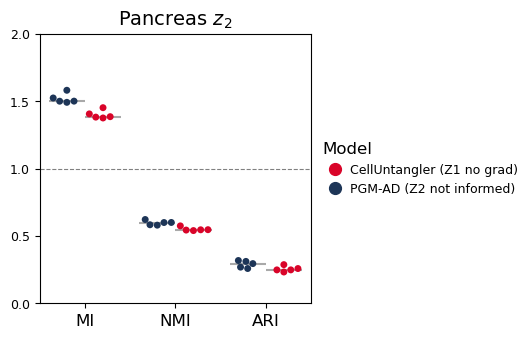

In [68]:
fig, ax = plt.subplots(figsize=fig_size)

sns.swarmplot(
    data=df_melted,
    x="metric",
    y="score",
    hue="model",
    dodge=True,
    palette=model_to_color,
    ax=ax,
    zorder=1
)

# Only  show median line
sns.boxplot(
    data=df_melted,
    x="metric",
    y="score",
    hue="model",
    palette=model_to_color,
    ax=ax,
    fill=False,
    showfliers=False,
    showmeans=False,
    showcaps=False,
    whiskerprops={"linewidth": 0}, 
    boxprops={"linewidth": 0},
    medianprops={"color": "darkgrey", "linewidth": 1.5},
    zorder=0
)

# Axes stuff
ax.set_title("Pancreas $z_2$", fontsize=large_fs+2)

ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=large_fs)

ax.set_ylabel("")
ax.set_ylim(0, 2)
ax.set_yticks(np.arange(0, 2.1, step=0.5))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=small_fs)

ax.axhline(y=1, color="grey", linestyle="--", linewidth=0.8, zorder=0)

# Legend stuff
labels = [model_to_name[label] for label in model_to_color.keys()]
handles = [Line2D([0], [0], marker="o", linestyle="None", color=color, markerfacecolor=color, markersize=8.5) for color in model_to_color.values()]

leg = plt.legend(handles=handles, labels=labels, loc="center left", frameon=False, fontsize=small_fs, title_fontsize=large_fs, alignment="left", handletextpad=0.2)
leg.set_title("Model")
leg.set_title("Model")
leg.set_bbox_to_anchor((1, 0.5))

plt.savefig(f"{path_to_figs}{path_to_evals.split('/')[-2]}_z2_eval.png", dpi=800, bbox_inches="tight")

### Visualizing z1 results: cell cycle phase / ccPhase

In [69]:
df = pd.read_csv(path_to_evals + "eval_ccPhase_subset_DuctalNgn3 low EP", sep="\t", index_col=0)
df = df[metrics_to_use + ["model", "latent", "iter"]]
df = df[df["latent"] == "z1"]
df = df[df.index.str.contains(cluster_to_use)]
df.sort_values(by=["model", "iter"])

,MI,NMI,ARI,model,latent,iter
z1_louvain,0.411701,0.188897,0.069456,cu,z1,r2 r2_seed_0_component1_r2
z1_louvain,0.400425,0.183970,0.055189,cu,z1,r2 r2_seed_1_component1_r2
z1_louvain,0.344379,0.168166,0.061807,cu,z1,r2 r2_seed_2_component1_r2
z1_louvain,0.422955,0.200009,0.069758,cu,z1,r2 r2_seed_3_component1_r2
z1_louvain,0.450431,0.214345,0.084917,cu,z1,r2 r2_seed_4_component1_r2
z1_louvain,0.554594,0.268154,0.125563,pgm,z1,seed_0
z1_louvain,0.610425,0.287949,0.131785,pgm,z1,seed_1
z1_louvain,0.553988,0.262240,0.093971,pgm,z1,seed_2
z1_louvain,0.541606,0.255625,0.099329,pgm,z1,seed_3
z1_louvain,0.562202,0.261634,0.089878,pgm,z1,seed_4


In [70]:
df_melted = df.melt(
    id_vars=["model", "latent", "iter"], 
    value_vars=["MI", "NMI", "ARI"],
    var_name="metric",
    value_name="score"
)
df_melted.sort_values(by=["metric", "model"]).head()

,model,latent,iter,metric,score
22,cu,z1,r2 r2_seed_1_component1_r2,ARI,0.055189
23,cu,z1,r2 r2_seed_0_component1_r2,ARI,0.069456
24,cu,z1,r2 r2_seed_4_component1_r2,ARI,0.084917
27,cu,z1,r2 r2_seed_3_component1_r2,ARI,0.069758
28,cu,z1,r2 r2_seed_2_component1_r2,ARI,0.061807


/tmp/ipykernel_3155817/3467573325.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=large_fs)


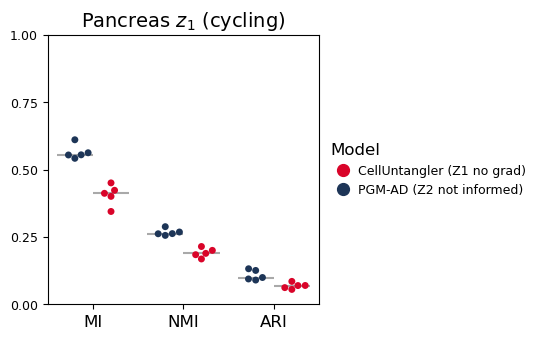

In [71]:
fig, ax = plt.subplots(figsize=fig_size)

sns.swarmplot(
    data=df_melted,
    x="metric",
    y="score",
    hue="model",
    dodge=True,
    palette=model_to_color,
    ax=ax
)

sns.boxplot(
    data=df_melted,
    x="metric",
    y="score",
    hue="model",
    palette=model_to_color,
    ax=ax,
    fill=False,
    showfliers=False,
    showmeans=False,
    showcaps=False,
    whiskerprops={"linewidth": 0}, 
    boxprops={"linewidth": 0},
    medianprops={"color": "darkgrey", "linewidth": 1.5},
    zorder=0
)

# Axes stuff
ax.set_title("Pancreas $z_1$ (cycling)", fontsize=large_fs+2)

ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=large_fs)

ax.set_ylabel("")
ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, step=0.25))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=small_fs)

# Legend stuff
labels = [model_to_name[label] for label in model_to_color.keys()]
handles = [Line2D([0], [0], marker="o", linestyle="None", color=color, markerfacecolor=color, markersize=8.5) for color in model_to_color.values()]

leg = plt.legend(handles=handles, labels=labels, loc="center left", frameon=False, fontsize=small_fs, title_fontsize=large_fs, alignment="left", handletextpad=0.2)
leg.set_title("Model")
leg.set_title("Model")
leg.set_bbox_to_anchor((1, 0.5))

plt.savefig(f"{path_to_figs}{path_to_evals.split('/')[-2]}_z1_eval.png", dpi=800, bbox_inches="tight")